In [ ]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
world_cup = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/World_cup_2023.csv')
results = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/results.csv')

In [ ]:
world_cup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [ ]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [ ]:
# Loading new datasets
ranking = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/Icc_ranking.csv')
fixtures = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/Fixtures.csv')

In [ ]:
ranking.head()

,Team_ranking,Team_name,Rating
0,1,Australia,118
1,2,Pakistan,116
2,3,India,115
3,4,New Zealand,104
4,5,England,101


In [ ]:
fixtures.head()

,Round_number,Team_1,Team_2,Date,Location,Group,Result
0,1,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


**EDA**

In [ ]:
# Data Cleaning:
# Check for missing values in each dataset
print(world_cup.isnull().sum())
print(results.isnull().sum())
print(ranking.isnull().sum())
print(fixtures.isnull().sum())

Team_name             0
Team_ranking          0
Titles                0
Win_percentage_ODI    0
WC_matches            0
WC_match_won          0
Win_percent_WC        0
WC_match_loss         0
Loss_percent_WC       0
Tied                  0
No_result             0
World_cup_winner      0
Recent_points         0
Rating                0
dtype: int64
date       0
Team_1     0
Team_2     0
Winner     0
Margin    49
Ground     0
dtype: int64
Team_ranking    0
Team_name       0
Rating          0
dtype: int64
Round_number     0
Team_1           0
Team_2           0
Date             0
Location         0
Group            3
Result          48
dtype: int64


In [ ]:
# Data Exploration:
# Summary statistics for numerical columns
world_cup.describe()

,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,Recent_points,Rating
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1.000000,48.935000,64.800000,36.200000,47.048000,26.800000,50.561000,0.800000,1.000000,2362.900000,96.800000
std,3.02765,1.563472,8.825435,29.199696,23.093048,22.737065,7.598245,23.829437,0.788811,0.666667,785.510655,23.436913
min,1.00000,0.000000,34.210000,15.000000,1.000000,6.660000,14.000000,24.460000,0.000000,0.000000,1044.000000,37.000000
25%,3.25000,0.000000,45.777500,46.000000,20.000000,38.125000,23.000000,36.215000,0.000000,1.000000,2011.500000,92.750000
50%,5.50000,0.500000,49.985000,79.500000,41.500000,57.395000,27.000000,39.525000,1.000000,1.000000,2438.500000,101.000000
75%,7.75000,1.000000,52.680000,83.750000,51.750000,60.345000,32.000000,59.062500,1.000000,1.000000,2774.000000,112.250000
max,10.00000,5.000000,61.000000,94.000000,69.000000,73.400000,39.000000,93.330000,2.000000,2.000000,3807.000000,118.000000


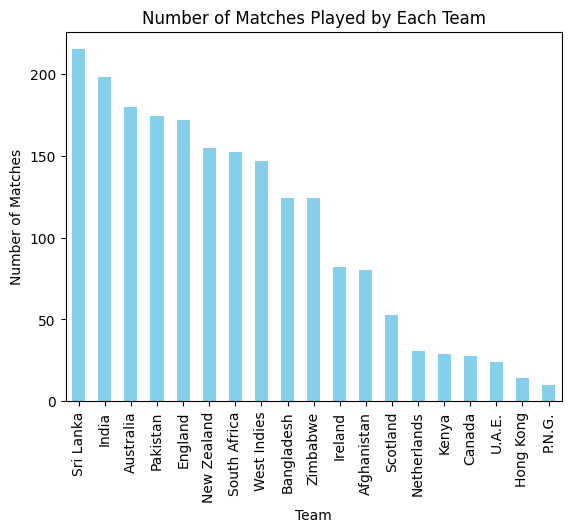

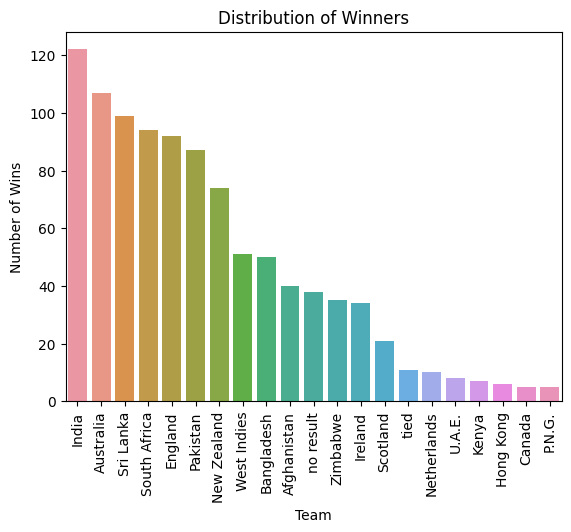

In [ ]:
# Results Data:
# Unique teams and their counts
team_counts = pd.concat([results['Team_1'], results['Team_2']]).value_counts()
team_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

# Distribution of winners
sns.countplot(x='Winner', data=results, order=results['Winner'].value_counts().index)
plt.title('Distribution of Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


##No.of titles won by each teams

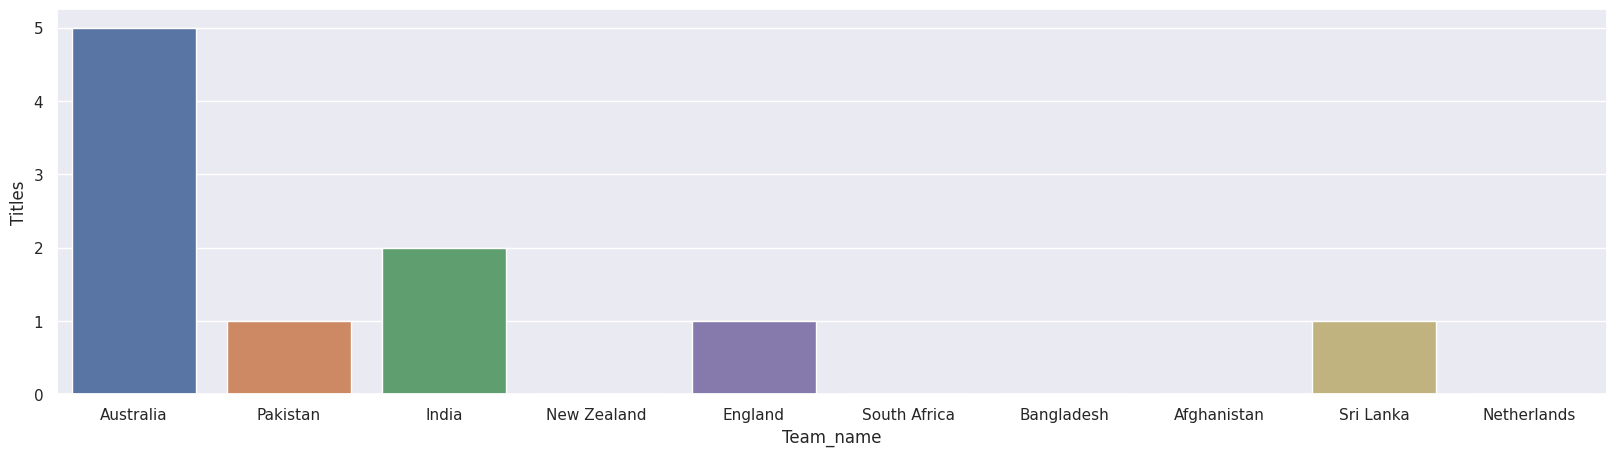

In [ ]:
# Set the figure size using sns.set
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using sns.barplot to visualize team titles
sns.barplot(x='Team_name', y='Titles', data=world_cup)

# Display the plot
plt.show()

##No.of matches won in world cup by each team

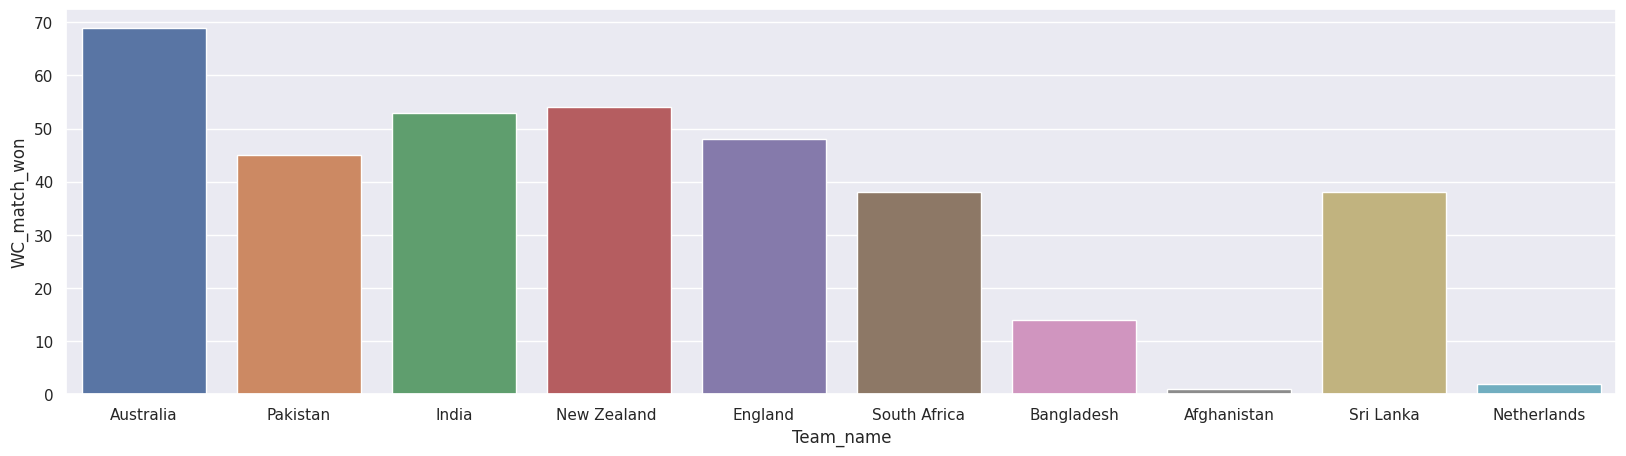

In [ ]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='WC_match_won', data=world_cup)

# Display the plot
plt.show()

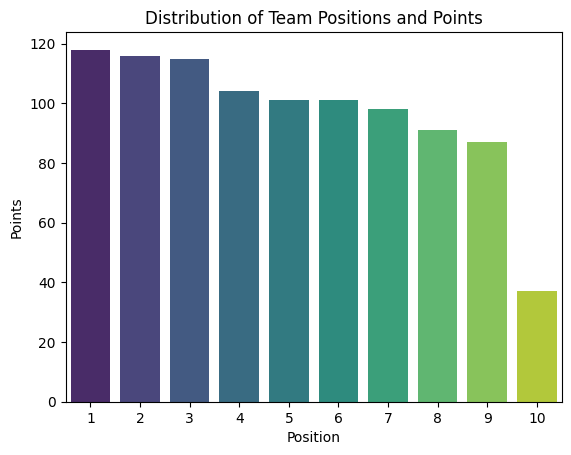

In [ ]:
# Rankings Data:
# Distribution of team positions
sns.barplot(x='Team_ranking', y='Rating', data=ranking, palette='viridis')
plt.title('Distribution of Team Positions and Points')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()

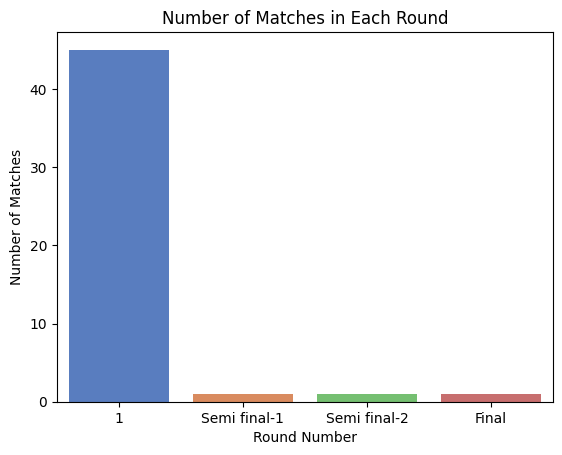

In [ ]:
#  Fixtures Data:
# Number of matches in each round
sns.countplot(x='Round_number', data=fixtures, palette='muted')
plt.title('Number of Matches in Each Round')
plt.xlabel('Round Number')
plt.ylabel('Number of Matches')
plt.show()

**Pre Processing**

In [ ]:
worldcup_teams = ['England', ' South Africa', '', 'West Indies',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

date      1445
Team_1    1445
Team_2    1445
Winner    1445
Margin    1368
Ground    1445
dtype: int64

In [ ]:
#dropping columns that wll not affect match outcomes
df_teams_2023 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
df_teams_2023.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [ ]:
df_teams_2023 = df_teams_2023.reset_index(drop=True)
df_teams_2023.loc[df_teams_2023.Winner == df_teams_2023.Team_1,'winning_team']=1
df_teams_2023.loc[df_teams_2023.Winner == df_teams_2023.Team_2, 'winning_team']=2
df_teams_2023 = df_teams_2023.drop(['winning_team'], axis=1)
df_teams_2023.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [ ]:
final = pd.get_dummies(df_teams_2023, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]

In [ ]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Model Building**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Model 2: Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Model 3: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(model, predictions):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("")

# Evaluate each model
evaluate_model(rf_model, rf_predictions)
evaluate_model(svm_model, svm_predictions)
evaluate_model(lr_model, lr_predictions)

Model: RandomForestClassifier
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

 Afghanistan       0.50      0.55      0.52        11
   Australia       0.68      0.81      0.74        63
  Bangladesh       0.85      0.46      0.59        24
     England       0.62      0.91      0.74        57
       India       0.73      0.91      0.81        64
     Ireland       0.00      0.00      0.00         3
       Kenya       0.00      0.00      0.00         0
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.63      0.74      0.68        35
    Pakistan       0.78      0.63      0.70        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.69      0.77      0.73        31
   Sri Lanka       0.59      0.50      0.54        46
 West Indies       0.64      0.44      0.52        16
    Zimbabwe       0.50      0.14      0.22         7
   no result       0.33      0.05      0.08        21
        tied

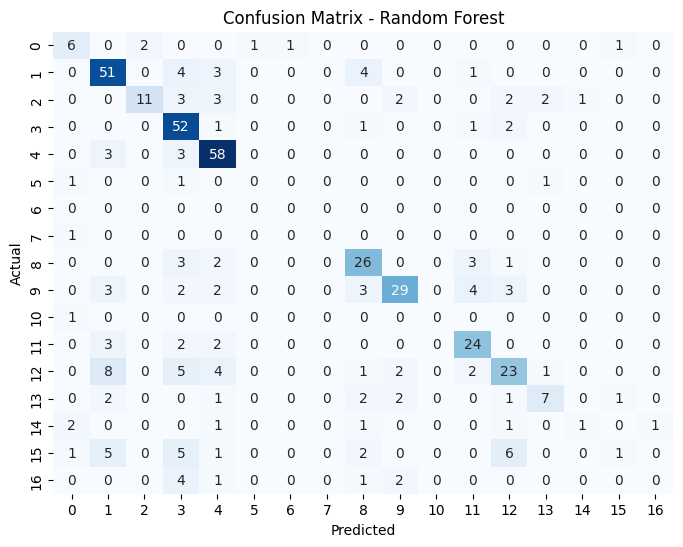

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

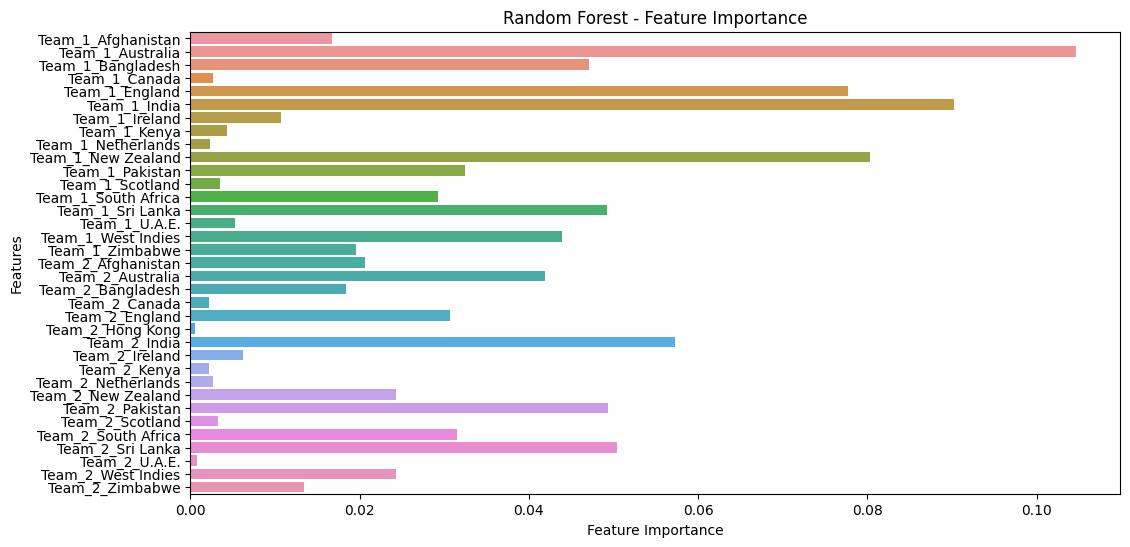

In [ ]:
# Feature importance for Random Forest
feature_importance = rf_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

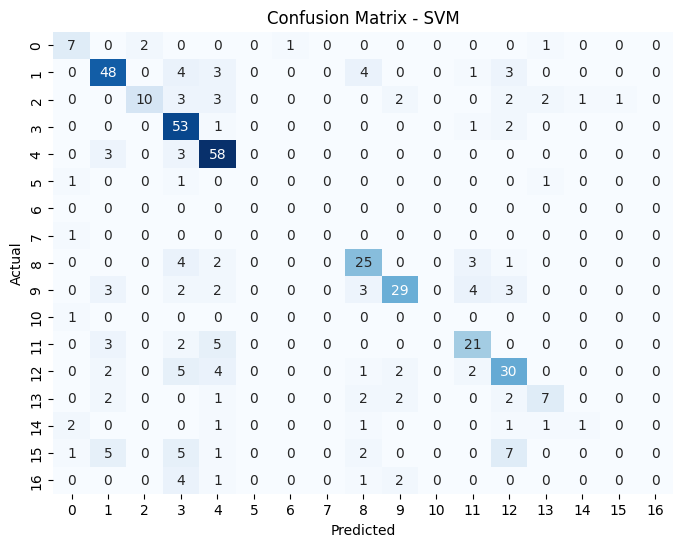

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for SVM
svm_predictions = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Ranking**

In [ ]:
# List for storing the group stage games
pred_set = []

# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team_name')['Team_ranking']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team_name')['Team_ranking']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
40,1,NaN,9.0,New Zealand,Sri Lanka,9/11/2023,"M.Chinnaswamy Stadium, Bengaluru",Group A,NaN
41,1,6.0,8.0,South Africa,Afghanistan,10/11/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
42,1,3.0,10.0,India,Netherlands,11/11/2023,"M.Chinnaswamy Stadium, Bengaluru",Group A,NaN
43,1,1.0,7.0,Australia,Bangladesh,12/11/2023,"Maharashtra Cricket Association Stadium, Pune",Group A,NaN
44,1,5.0,2.0,England,Pakistan,12/11/2023,"Eden Gardens, Kolkata",Group A,NaN


In [ ]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,New Zealand,England,None
1,Netherlands,Pakistan,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,Australia,India,None


In [ ]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#group matches
predictions = rf_model.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])

    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

England and New Zealand
Winner: New Zealand

Pakistan  and Netherlands
Winner: Netherlands

Afghanistan and Bangladesh
Winner: Bangladesh

Sri Lanka and South Africa
Winner: South Africa

India and Australia
Winner: Australia

New Zealand and Netherlands
Winner: Netherlands

Bangladesh and England
Winner: England

Afghanistan and India
Winner: India

Pakistan  and Sri Lanka
Winner: Sri Lanka

South Africa and Australia
Winner: Australia

New Zealand and Bangladesh
Winner: Bangladesh

Afghanistan and England
Winner: England

India and Pakistan
Winner: Pakistan

Sri Lanka and Australia
Winner: Australia

Netherlands and South Africa
Winner: South Africa

New Zealand and Afghanistan
Winner: Afghanistan

Bangladesh and India
Winner: India

Pakistan and Australia
Winner: Australia

Netherlands and Sri Lanka
Winner: Sri Lanka

South Africa and England
Winner: England

India and New Zealand
Winner: New Zealand

Pakistan  and Afghanistan
Winner: Afghanistan

Bangladesh and South Africa
Winner:

In [ ]:
# List of tuples before
#semi = [('Australia', 'England'),
            #('India', 'South Africa')]

In [ ]:

predictions = rf_model.predict(pred_set)

# Create a DataFrame to store match results and predicted winners
results_df = pd.DataFrame({
    'Team1': backup_pred_set.iloc[:, 0],
    'Team2': backup_pred_set.iloc[:, 1],
    'Predicted_Winner': predictions
})

# Create a dictionary to store team scores
team_scores = {}

# Process match results and update scores
for i in range(results_df.shape[0]):
    winner = results_df.iloc[i, 1] if results_df.iloc[i, 2] == 1 else results_df.iloc[i, 0]

    # Update team scores
    team_scores[winner] = team_scores.get(winner, 0) + 1

# Sort teams based on scores
sorted_teams = sorted(team_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top 4 teams
top_4_teams = sorted_teams[:4]

# Display the top 4 teams in the specified format
top_teams_tuples = [(top_4_teams[0][0], top_4_teams[-1][0]), (top_4_teams[1][0], top_4_teams[2][0])]

print("Top 4 Teams (Two Tuples):")
print(top_teams_tuples)


Top 4 Teams (Two Tuples):
[('Australia', 'Bangladesh'), ('South Africa', 'India')]


In [ ]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team_name'] == match[0],'Team_ranking'].iloc[0])
        positions.append(ranking.loc[ranking['Team_name'] == match[1],'Team_ranking'].iloc[0])

    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    # predictions = logreg.predict(pred_set)
    # for i in range(len(pred_set)):
    #     print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    #     if predictions[i] == 1:
    #         print("Winner: " + backup_pred_set.iloc[i, 1])
    #     else:
    #         print("Winner: " + backup_pred_set.iloc[i, 0])
    #     print("")


    winners = []

    # ... (remaining code)

    # Predict!
    predictions = logreg.predict(pred_set)

    for i in range(len(pred_set)):
        team1 = backup_pred_set.iloc[i, 1]
        team2 = backup_pred_set.iloc[i, 0]

        if predictions[i] == 1:
            winners.append(team1)
        else:
            winners.append(team2)

        print(team1 + " and " + team2)
        if predictions[i] == 1:
            print("Winner: " + team1)
        else:
            print("Winner: " + team2)
        print("")

    # Return the winners in a single tuple
    if len(winners) == 1:
      return winners[0]
    else:
      return [(winners[0], winners[1])]



In [ ]:
finals=clean_and_predict(top_teams_tuples, ranking, final, rf_model)
print("Finals Tuple:")
print(finals)

Bangladesh and Australia
Winner: Australia

South Africa and India
Winner: India

Finals Tuple:
[('Australia', 'India')]


In [ ]:
winner=clean_and_predict(finals, ranking, final, rf_model)
print(winner)

India and Australia
Winner: Australia

Australia
